GLASSDOOR JOBS

# INTRODUCTION
This project invloves data cleaning and explaratory data analysis to get meaningful insights from the data.

DATASET - https://www.kaggle.com/datasets/rrkcoder/glassdoor-data-science-job-listings/data

DATA UNDERSTANDING
The data contains information on 1500 job postings on data science.

Columns;
- Job Title: The title of the data science job position.
- Salary Estimate: The estimated salary range associated with the job.
- Job Description: A detailed description of the responsibilities and requirements for the job.
- Rating: The company's rating on Glassdoor.
- Company Name: The name of the hiring company.
- Location: The geographical location of the job.
- Size: The size of the company in terms of employees.
- Founded: The year the company was founded.
- Type of Ownership: The ownership structure of the company (e.g., public, private).
- Industry: The industry in which the company operates.
- Sector: The sector to which the company belongs.
- Revenue: The revenue of the company

QUESTIONS
Does the company name and its rating correlate with salary
which company pays the most money
are publc or private companies better
what educations is most prevalent
how does revenue relate do salaries

OBJECTIVES


In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load the dataset
df = pd.read_csv(r"C:\Users\nimu\Downloads\archive (14)\glassdoor_jobs.csv")
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,-1,Job Overview\nA Data Scientist at ExploreLearn...,4.2,Cambium Learning Group\n4.3,Remote,1001 to 5000 Employees,2004,Company - Private,Primary & Secondary Schools,Education,$500 million to $1 billion (USD)
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD)
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD)
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD)
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD)


In [3]:
df.shape

(1500, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1500 non-null   object 
 1   Salary Estimate    1500 non-null   object 
 2   Job Description    1500 non-null   object 
 3   Rating             1500 non-null   float64
 4   Company Name       1500 non-null   object 
 5   Location           1500 non-null   object 
 6   Size               1500 non-null   object 
 7   Founded            1500 non-null   int64  
 8   Type of ownership  1500 non-null   object 
 9   Industry           1500 non-null   object 
 10  Sector             1500 non-null   object 
 11  Revenue            1500 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 140.8+ KB


In [5]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64

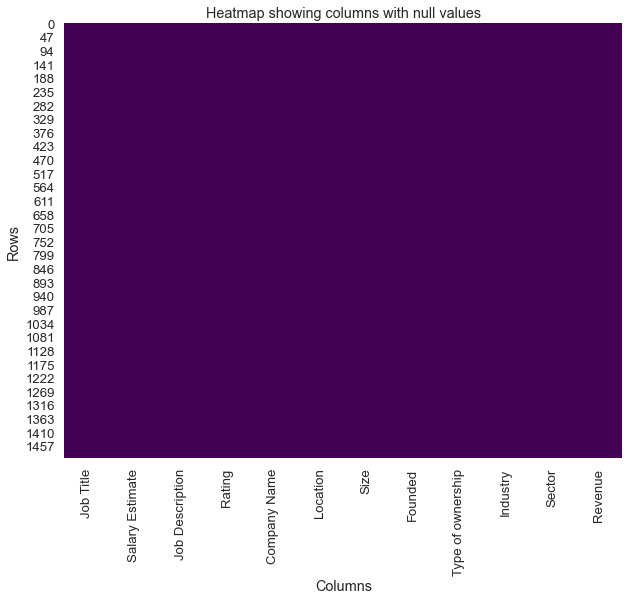

In [6]:
# set figure size
plt.figure(figsize=(10, 8))
# adjust font scale
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(),  cbar=False, cmap='viridis', )
#set labels
plt.title('Heatmap showing columns with null values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# Extract all numeric values from the 'Employer Provided Salary' column
salary_values = df['Salary Estimate'].str.findall(r'\$(\d+)K')

# Extract minimum and maximum values from the lists
df['Min_Salary'] = salary_values.apply(lambda x: min(map(int, x)) * 1000 if x else None)
df['Max_Salary'] = salary_values.apply(lambda x: max(map(int, x)) * 1000 if x else None)

# Calculate average salary
df['Average_Salary'] = (df['Min_Salary'] + df['Max_Salary']) / 2

# Handle missing data
df['Min_Salary'].fillna(0, inplace=True)
df['Max_Salary'].fillna(0, inplace=True)
df['Average_Salary'].fillna(0, inplace=True)


In [9]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Average_Salary
0,Data Scientist,-1,Job Overview\nA Data Scientist at ExploreLearn...,4.2,Cambium Learning Group\n4.3,Remote,1001 to 5000 Employees,2004,Company - Private,Primary & Secondary Schools,Education,$500 million to $1 billion (USD),0.0,0.0,0.0
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD),83000.0,153000.0,118000.0
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD),71000.0,133000.0,102000.0
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD),94000.0,183000.0,138500.0
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD),48000.0,78000.0,63000.0


In [10]:

# import re

# # Function to extract and convert values in a specific column
# def extract_and_convert_column_value(text):
#     match = re.match(r'(\d+)\s*to\s*(\d+)\s*(million|billion)', str(text), re.IGNORECASE)
    
#     if match:
#         lower_value, upper_value, scale = match.groups()
#         multiplier = 1_000_000_000 if scale.lower() == 'billion' else 1_000_000
#         lower_value = int(lower_value) * multiplier
#         upper_value = int(upper_value) * multiplier
#         return lower_value, upper_value
    
#     return None, None

# # Apply the function to the specified column
# df[['Lower_Value', 'Upper_Value']] = df['Revenue'].apply(extract_and_convert_column_value).apply(pd.Series)



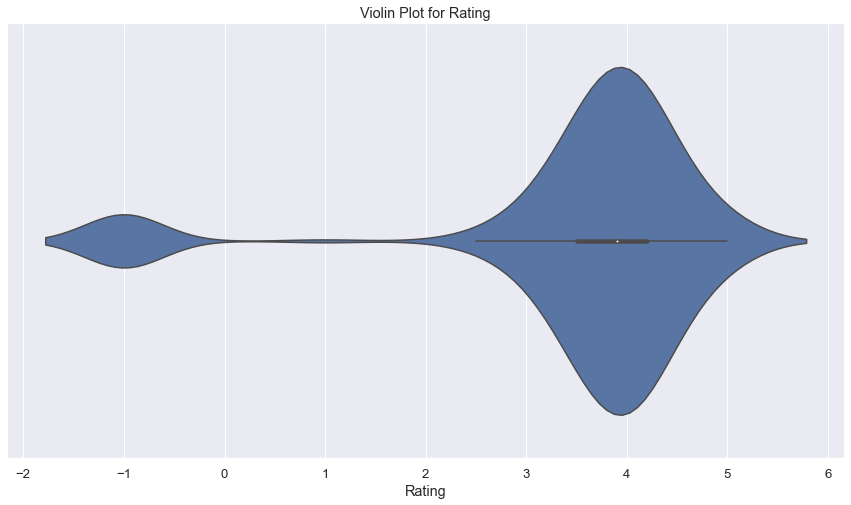

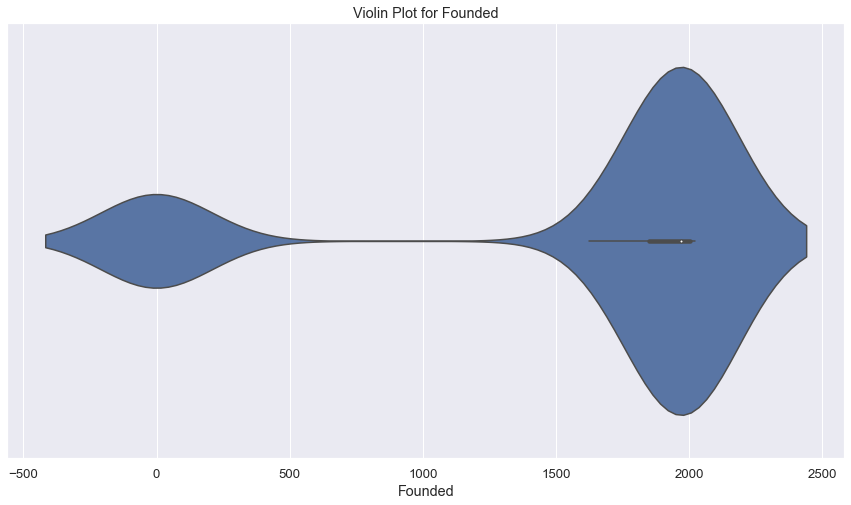

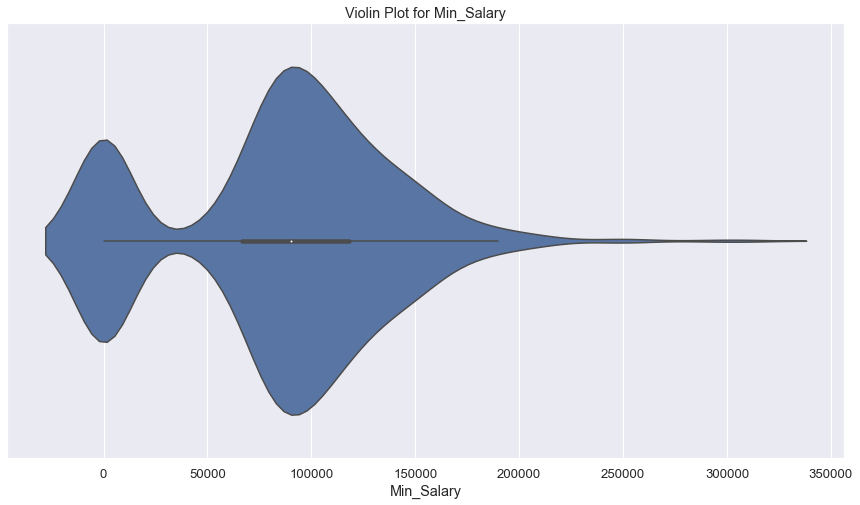

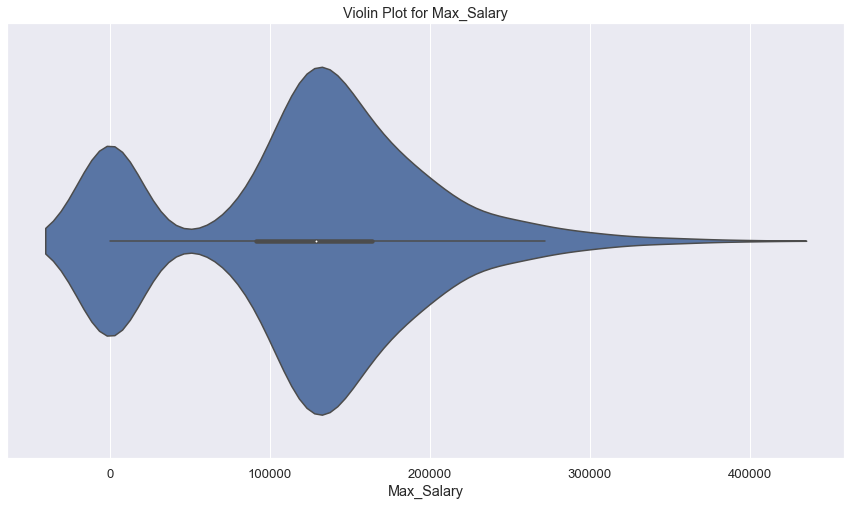

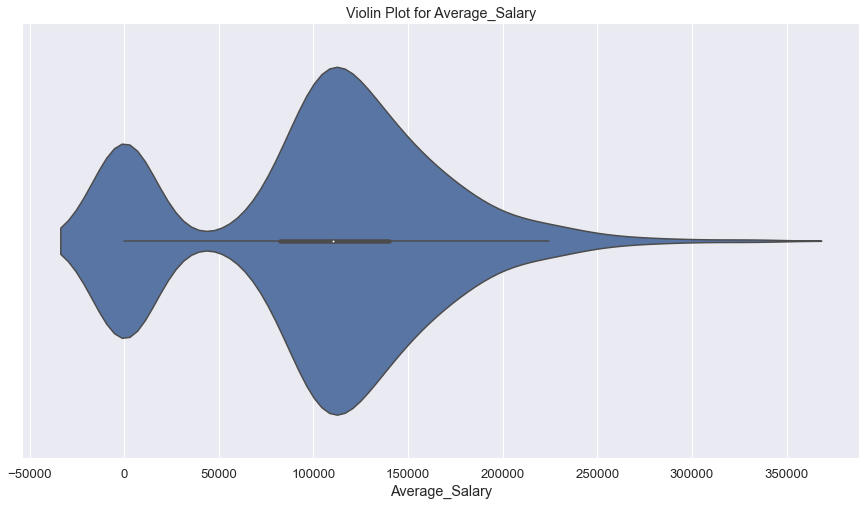

In [11]:
# Iterate through each column and create a violin plot for numeric columns
for column in df.columns:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(15, 8))  # Adjust the figure size if needed
        sns.violinplot(x=df[column])
        plt.title(f'Violin Plot for {column}')
        plt.show()


In [12]:
#conditions for dropping rows
condition1 = df['Revenue'] == 'Unknown / Non-Applicable'
condition2 = df['Revenue'] == '-1'

# Combine conditions
rows_to_drop = df[condition1 | condition2].index

# Drop rows based on the conditions
df.drop(rows_to_drop, inplace=True, axis=0)


In [13]:
#conditions for dropping row
indices_to_drop = df[(df['Founded'] == -1)].index
df.drop(indices_to_drop, inplace=True, axis=0)

In [14]:
#conditions for dropping row
indices_to_drop = df[(df['Rating'] == -1)].index
df.drop(indices_to_drop, inplace=True, axis=0)

In [15]:
#conditions for dropping row
indices_to_drop = df[(df['Average_Salary'] == 0)].index
df.drop(indices_to_drop, inplace=True, axis=0)

In [16]:
#conditions for dropping row
indices_to_drop = df[(df['Min_Salary'] == 0)].index
df.drop(indices_to_drop, inplace=True, axis=0)

In [17]:
#conditions for dropping row
indices_to_drop = df[(df['Max_Salary'] == 0)].index
df.drop(indices_to_drop, inplace=True, axis=0)

In [18]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Min_Salary           float64
Max_Salary           float64
Average_Salary       float64
dtype: object

In [19]:
# converting all characters to lower case
# df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

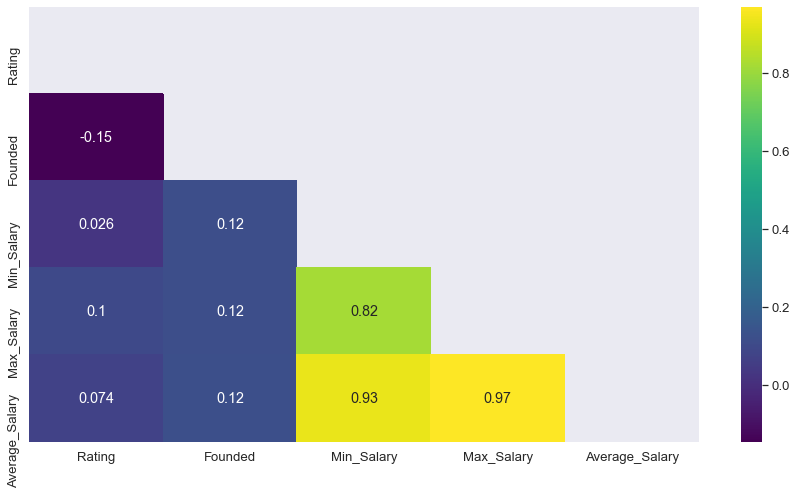

In [20]:
# Create a heatmap to visualize correlations
plt.figure(figsize=(15, 8))
mask = np.triu(df.corr())  # Create a mask to display only the upper half of the matrix
sns.heatmap(df.corr(), annot=True, cmap='viridis', mask=mask)
plt.show()

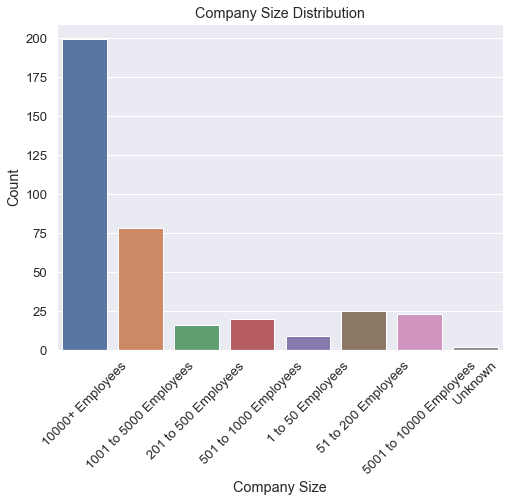

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Size')
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

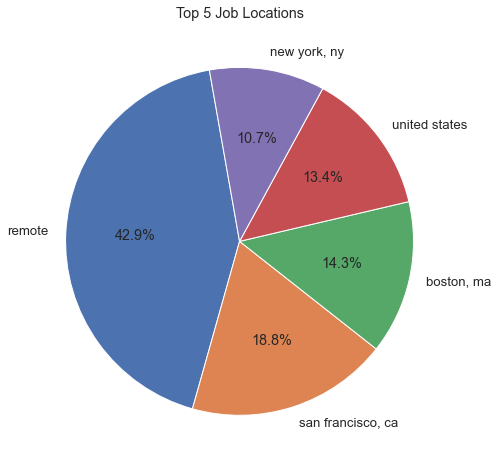

In [92]:
# Location-based Analysis

location_counts = df['Location'].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Top 5 Job Locations')
plt.show()